<b> sentitment Analysis </b> <br>
process of computationally identifying and categorizing opinions from piece of text, determine whether the writer's attitude towards a particular topic or the product, is positive,negative,or neutral 

In [53]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
import os

In [0]:
os.chdir('/content/drive/My Drive/machine_learning/')

In [0]:
import pandas as pd
import numpy as np

In [0]:
train = pd.read_csv('/content/drive/My Drive/machine_learning/train_F3WbcTw.csv')

In [60]:

train.head()

,unique_hash,text,drug,sentiment
0,2e180be4c9214c1f5ab51fd8cc32bc80c9f612e0,"Autoimmune diseases tend to come in clusters. As for Gilenya – if you feel good, don’t think about it, it won’t change anything but waste your time and energy. I’m taking Tysabri and feel amazing, no symptoms (other than dodgy color vision, but I’ve had it since always, so, don’t know) and I don...",gilenya,2
1,9eba8f80e7e20f3a2f48685530748fbfa95943e4,"I can completely understand why you’d want to try it. But, results reported in lectures don’t always stand up to the scrutiny of peer-review during publication. There so much still to do before this is convincing. I hope that it does work out, I really do. And if you’re aware of and happy with t...",gilenya,2
2,fe809672251f6bd0d986e00380f48d047c7e7b76,"Interesting that it only targets S1P-1/5 receptors rather than 1-5 like Fingolimod. Hoping to soon see what the AEs and SAEs were Yes. I'm not sure what this means, exactly: Quote Nine patients reported serious adverse events (2 mg: 3/29 [10.3%], 1.25 mg: 1/43 [2.3%], 0.5 mg: 4/29 [13.8%], and ...",fingolimod,2
3,bd22104dfa9ec80db4099523e03fae7a52735eb6,"Very interesting, grand merci. Now I wonder where lemtrada and ocrevus sales would go, if they prove anti-cd20 are induction",ocrevus,2
4,b227688381f9b25e5b65109dd00f7f895e838249,"Hi everybody, My latest MRI results for Brain and Cervical Cord are in and my next Neurologist appointment is in the next couple of weeks. There’re no new lesions in Brain/Cord and I’ve had no relapses while I was on Gilenya. This was a good sign. But there was one line in the cervical cord revi...",gilenya,1


In [61]:
train['drug'].isnull().value_counts()

False    5279
Name: drug, dtype: int64

In [0]:
test = pd.read_csv('/content/drive/My Drive/machine_learning/test_tOlRoBf.csv')

In [0]:
test.sentiment = 0

In [226]:
total_data = pd.concat([train,test],axis = 0)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [0]:
ratio = train.shape[0]/total_data.shape[0]

In [228]:
total_data.head()

,drug,sentiment,text,unique_hash
0,gilenya,2.0,"Autoimmune diseases tend to come in clusters. As for Gilenya – if you feel good, don’t think about it, it won’t change anything but waste your time and energy. I’m taking Tysabri and feel amazing, no symptoms (other than dodgy color vision, but I’ve had it since always, so, don’t know) and I don...",2e180be4c9214c1f5ab51fd8cc32bc80c9f612e0
1,gilenya,2.0,"I can completely understand why you’d want to try it. But, results reported in lectures don’t always stand up to the scrutiny of peer-review during publication. There so much still to do before this is convincing. I hope that it does work out, I really do. And if you’re aware of and happy with t...",9eba8f80e7e20f3a2f48685530748fbfa95943e4
2,fingolimod,2.0,"Interesting that it only targets S1P-1/5 receptors rather than 1-5 like Fingolimod. Hoping to soon see what the AEs and SAEs were Yes. I'm not sure what this means, exactly: Quote Nine patients reported serious adverse events (2 mg: 3/29 [10.3%], 1.25 mg: 1/43 [2.3%], 0.5 mg: 4/29 [13.8%], and ...",fe809672251f6bd0d986e00380f48d047c7e7b76
3,ocrevus,2.0,"Very interesting, grand merci. Now I wonder where lemtrada and ocrevus sales would go, if they prove anti-cd20 are induction",bd22104dfa9ec80db4099523e03fae7a52735eb6
4,gilenya,1.0,"Hi everybody, My latest MRI results for Brain and Cervical Cord are in and my next Neurologist appointment is in the next couple of weeks. There’re no new lesions in Brain/Cord and I’ve had no relapses while I was on Gilenya. This was a good sign. But there was one line in the cervical cord revi...",b227688381f9b25e5b65109dd00f7f895e838249


<b>
 Clean up text with RegEx</b>

In [0]:
data = total_data.copy()
# data = train.copy()

In [0]:
# Inspect the cleaned text. 
data['text'] = data['text'].str.lower()

In [0]:
import pandas as pd
import numpy as np
import json
import nltk
import re
import csv
import matplotlib.pyplot as plt 
import seaborn as sns
from tqdm import tqdm
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

%matplotlib inline
pd.set_option('display.max_colwidth', 300)

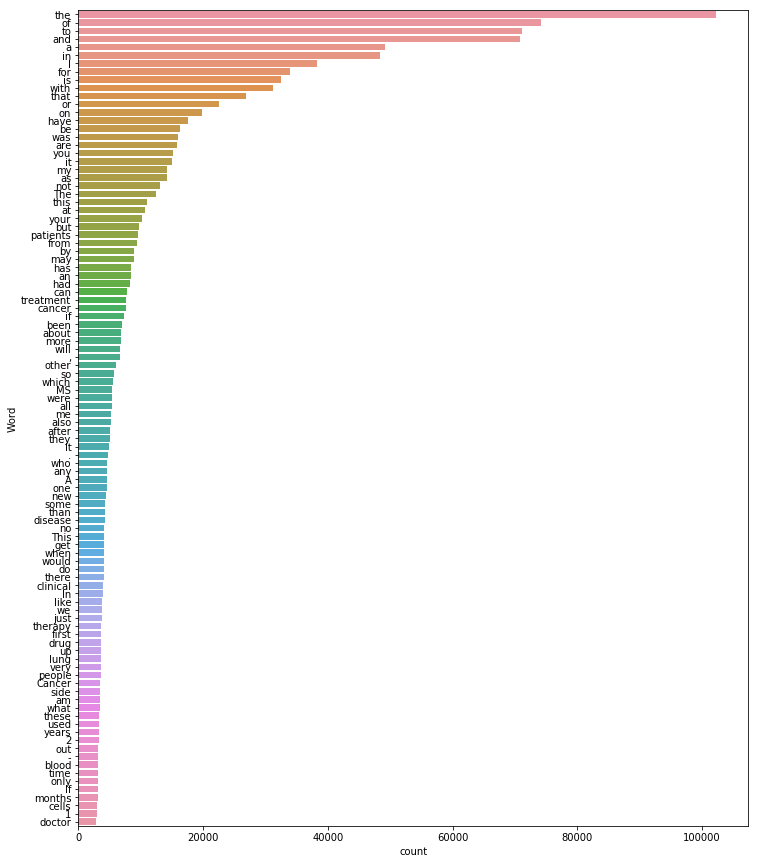

In [231]:
def freq_words(x, terms = 30): 
  all_words = ' '.join([text for text in x]) 
  all_words = all_words.split() 
  fdist = nltk.FreqDist(all_words) 
  words_df = pd.DataFrame({'word':list(fdist.keys()), 'count':list(fdist.values())}) 
  
  # selecting top 20 most frequent words 
  d = words_df.nlargest(columns="count", n = terms) 
  
  # visualize words and frequencies
  plt.figure(figsize=(12,15)) 
  ax = sns.barplot(data=d, x= "count", y = "word") 
  ax.set(ylabel = 'Word') 
  plt.show()
  
# print 100 most frequent words 
freq_words(data['text'], 100)

## label encode the column which contain the name of drugs

In [232]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(data['drug'])

LabelEncoder()

In [0]:
data['encoded_drug'] = le.transform(data['drug'])

In [234]:
data.text.head()

0    Autoimmune diseases tend to come in clusters. As for Gilenya – if you feel good, don’t think about it, it won’t change anything but waste your time and energy. I’m taking Tysabri and feel amazing, no symptoms (other than dodgy color vision, but I’ve had it since always, so, don’t know) and I don...
1    I can completely understand why you’d want to try it. But, results reported in lectures don’t always stand up to the scrutiny of peer-review during publication. There so much still to do before this is convincing. I hope that it does work out, I really do. And if you’re aware of and happy with t...
2    Interesting that it only targets S1P-1/5 receptors rather than 1-5 like Fingolimod. Hoping to soon see what the AEs and SAEs were Yes. I'm not sure what this means, exactly:  Quote Nine patients reported serious adverse events (2 mg: 3/29 [10.3%], 1.25 mg: 1/43 [2.3%], 0.5 mg: 4/29 [13.8%], and ...
3                                                                                    

In [0]:
# # Inspect the cleaned text. 
# data['text'] = data['text'].str.lower()

# data['text'].head(5)
# # Nailed it.

A <b>bag-of-words</b> representation of a document does not only contain specific words but all the unique words in a document and their frequencies of occurrences. A bag is a mathematical set here, so by the definition of a set, the bag does not contain any duplicate words.

In [0]:
# VECTORIZE IT (One Hot Encode It)
# Each word becomes one feature (column)
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(binary=True)
cv.fit(data['text'])

# Define my X & create my matrix with n things and n features
# X = cv.transform(data['clean_text'])
X = cv.transform(data['text'])

# Define my y with 
y = data["sentiment"]

## now we'll add one more feature to the sparse matrix i.e. X using hstack

In [0]:
from scipy.sparse import hstack

In [0]:
X = hstack((X,np.array(data['encoded_drug'])[:,None]))

### covert coo matrix to sparse

In [0]:
X = X.tocsr()

In [241]:
X[0]

<1x47961 sparse matrix of type '<class 'numpy.int64'>'
	with 57 stored elements in Compressed Sparse Row format>

In [0]:
xx = X[:train.shape[0],:]
yy = y[:train.shape[0]]

In [243]:
xx.shape

(5279, 47961)

In [0]:
xx_test = X[train.shape[0]:,:]
yy_test = y[train.shape[0]:]

In [245]:
test.shape

(2924, 3)

In [246]:
yy_test.shape

(2924,)

In [247]:
yy = np.asarray(yy)
np.size(yy,0)

5279

In [248]:
yy_test = np.asarray(yy_test)
np.size(yy_test,0)

2924

In [249]:
data['encoded_drug'].head()

0    44
1    44
2    40
3    70
4    44
Name: encoded_drug, dtype: int64

In [0]:
np.random.seed()
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

from xgboost import XGBClassifier

X_train, X_val, y_train, y_val = train_test_split(xx, yy, test_size = 0.275,random_state = 324)







## Support Vector Machines

In [275]:
# import support vector classifier 
from sklearn.svm import SVC # "Support Vector Classifier" 
clf_svm = SVC(kernel='linear') 
  
# fitting x samples and y classes 
clf_svm.fit(X_train, y_train) 

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [276]:
y_pred_svm = clf_svm.predict(X_val)
accuracy_score(y_val,y_pred_svm)

0.6311360448807855

In [277]:
from sklearn.metrics import f1_score
f1_score(y_val, y_pred_svm, average='macro')

0.4363535547927218

In [0]:
submission = pd.read_csv('/content/drive/My Drive/machine_learning/sample_submission_i5xnIZD.csv')

In [0]:
submission['sentiment'] = clf_svm.predict(xx_test)

In [0]:
# submission['sentiment'] = model.predict(xx_test)

In [281]:
submission.sentiment.value_counts()

2.0    2253
0.0     339
1.0     332
Name: sentiment, dtype: int64

In [0]:
submission.to_csv('/content/drive/My Drive/machine_learning/output.csv',index = False)